In [1]:
import os
import numpy as np
import pandas as pd

os.chdir('../core')

In [2]:
DATA_DIR = "../data"
FILE_NAME = "train.csv"

df = pd.read_csv(os.path.join(DATA_DIR, FILE_NAME))
df = df.drop(columns=["Employee ID"])
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df["Attrition"] = df["Attrition"].map({"Stayed": 1, "Left": 0})
print(df.shape)

df.head(5)

(59598, 23)


,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,29,Female,10,Education,4262,Fair,Medium,High,0,Yes,...,0,Senior,Small,52,No,No,No,Poor,High,1
1,18,Male,3,Finance,9032,Good,Very High,High,3,Yes,...,3,Entry,Medium,50,No,No,No,Good,Medium,0
2,30,Female,9,Healthcare,8610,Poor,Medium,Average,2,No,...,4,Entry,Large,62,No,No,No,Fair,Low,0
3,46,Male,2,Education,5071,Fair,High,Average,1,Yes,...,0,Entry,Small,39,No,No,No,Good,High,0
4,37,Male,17,Technology,10037,Fair,High,Average,0,No,...,1,Mid,Medium,42,No,No,No,Good,Low,0


In [3]:
# Create dataframe to show the percentage of missing values in each column
missing_values = df.isnull().mean() * 100
missing_values = missing_values.reset_index(name="Percentage")
missing_values = missing_values.rename(columns={"index": "Feature"})
missing_values

,Feature,Percentage
0,Age,0.0
1,Gender,0.0
2,Years at Company,0.0
3,Job Role,0.0
4,Monthly Income,0.0
5,Work-Life Balance,0.0
6,Job Satisfaction,0.0
7,Performance Rating,0.0
8,Number of Promotions,0.0
9,Overtime,0.0


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from processor import LabelEncoderTransformer


target_column = "Attrition"

# Choose numeric columns except the target column
numeric_columns = df.drop(columns=[target_column]).select_dtypes(include=['int64', 'float64']).columns.tolist()
category_columns = df.select_dtypes(include=['object']).columns.tolist()

processor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', LabelEncoderTransformer(), category_columns)
    ]
)

X = processor.fit_transform(df.drop(columns=[target_column]), df[target_column])
y = df[target_column].values.reshape(-1, 1)

X

array([[-0.79190512, -0.51164494, -1.4131925 , ...,  0.        ,
         3.        ,  0.        ],
       [-1.70253344, -1.13409473,  0.80392784, ...,  0.        ,
         2.        ,  2.        ],
       [-0.70912073, -0.60056634,  0.60778009, ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [ 0.0359388 , -1.22301613, -1.15662008, ...,  0.        ,
         2.        ,  1.        ],
       [-0.87468951,  0.02188346,  1.39515994, ...,  0.        ,
         2.        ,  2.        ],
       [-0.21241438,  0.64433325, -1.38019134, ...,  0.        ,
         2.        ,  2.        ]])

# Gradient Descent

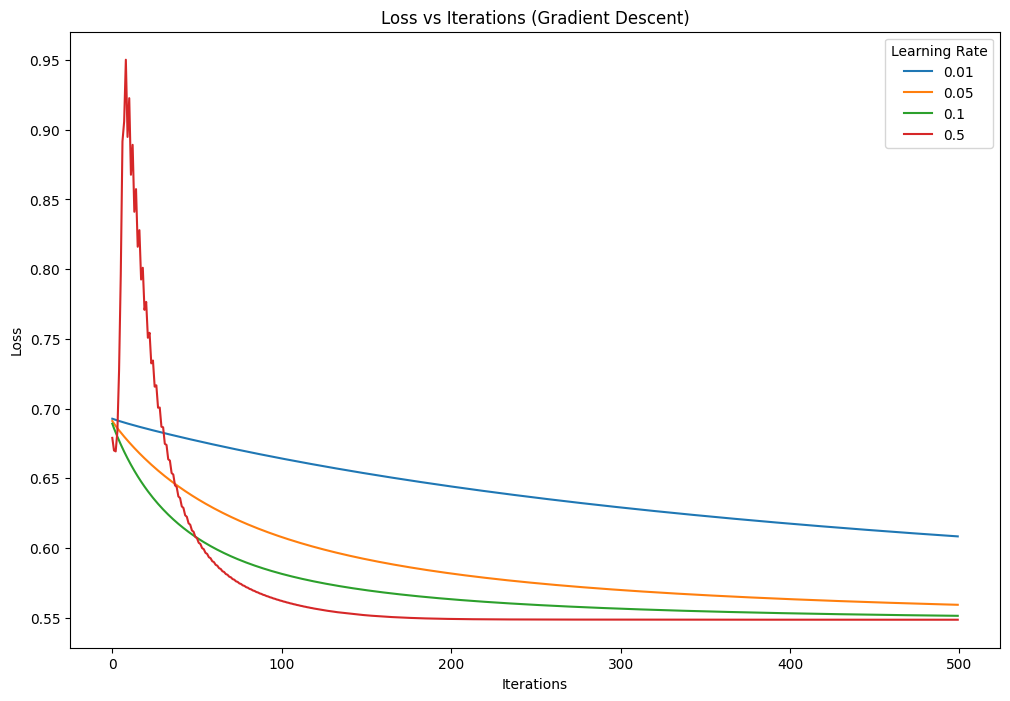

In [5]:
import matplotlib.pyplot as plt
from model import LogisticRegression

learning_rates = [0.01, 0.05, 0.1, 0.5]
num_iterations = 500

loggers = {}
for learning_rate in learning_rates:
    lr = LogisticRegression(
        learning_rate=learning_rate, 
        num_iterations=num_iterations, 
        solver='gradient-descent', 
        log=True
    )
    lr.fit(X, y)

    loggers[learning_rate] = lr.solver.history


# Plot loss
plt.figure(figsize=(12, 8))
for learning_rate in learning_rates:
    plt.plot(range(len(loggers[learning_rate])), loggers[learning_rate], label=f"{learning_rate}")

plt.title("Loss vs Iterations (Gradient Descent)")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(title="Learning Rate")
plt.show()

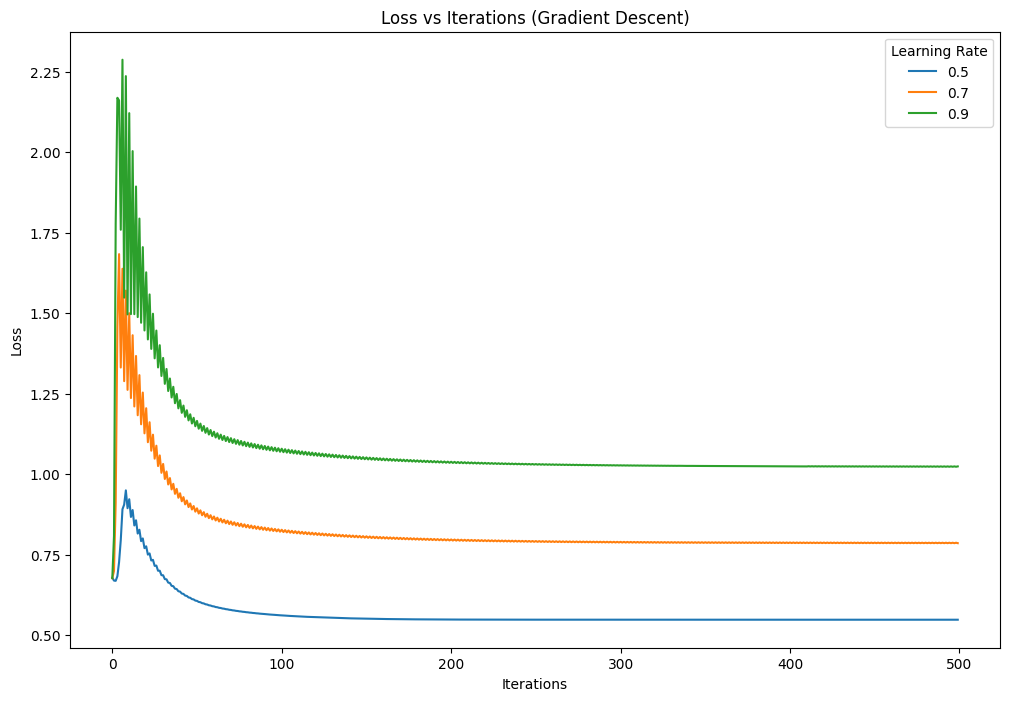

In [6]:
import matplotlib.pyplot as plt
from model import LogisticRegression


learning_rates = [0.5, 0.7, 0.9]
num_iterations = 500

loggers = {}
for learning_rate in learning_rates:
    lr = LogisticRegression(
        learning_rate=learning_rate, 
        num_iterations=num_iterations, 
        solver='gradient-descent', 
        log=True
    )
    lr.fit(X, y)

    loggers[learning_rate] = lr.solver.history


# Plot loss
plt.figure(figsize=(12, 8))
for learning_rate in learning_rates:
    plt.plot(range(len(loggers[learning_rate])), loggers[learning_rate], label=f"{learning_rate}")

plt.title("Loss vs Iterations (Gradient Descent)")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(title="Learning Rate")
plt.show()

# Gradient Descent with L1

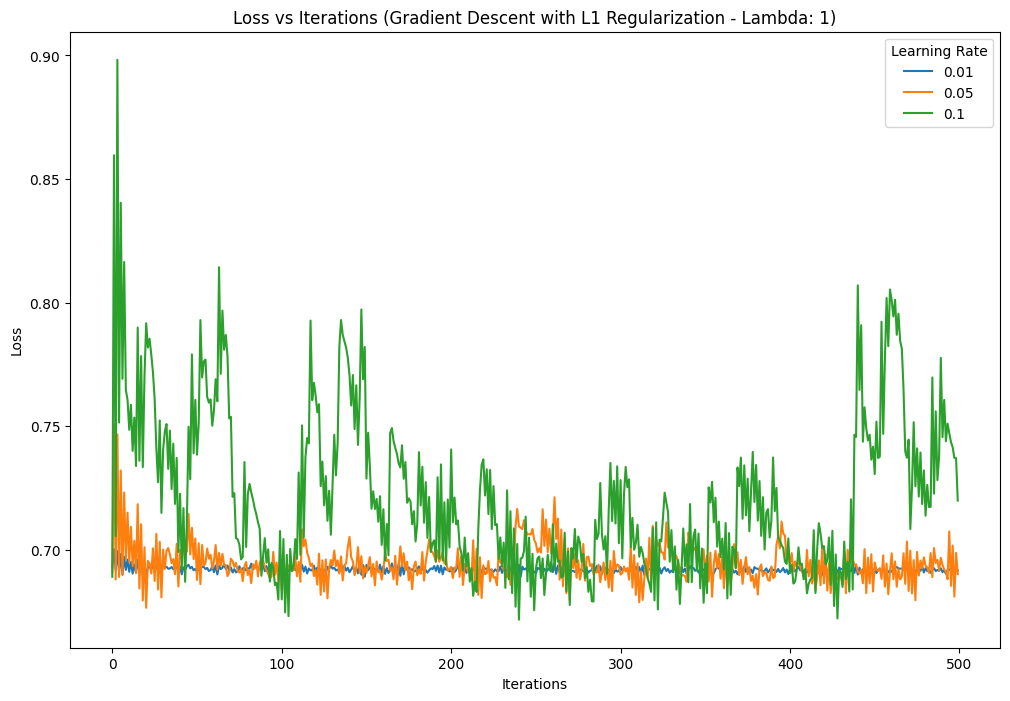

In [7]:
import matplotlib.pyplot as plt
from model import LogisticRegression

learning_rates = [0.01, 0.05, 0.1]
num_iterations = 500
lambda_ = 1

loggers = {}
for learning_rate in learning_rates:
    lr = LogisticRegression(
        learning_rate=learning_rate, 
        num_iterations=num_iterations, 
        solver='gradient-descent',
        regularization='l1',
        lambda_=lambda_,
        log=True
    )
    lr.fit(X, y)

    loggers[learning_rate] = lr.solver.history


# Plot loss
plt.figure(figsize=(12, 8))
for learning_rate in learning_rates:
    plt.plot(range(len(loggers[learning_rate])), loggers[learning_rate], label=f"{learning_rate}")

plt.title(f"Loss vs Iterations (Gradient Descent with L1 Regularization - Lambda: {lambda_})")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(title="Learning Rate")
plt.show()

# Gradient Descent with L2

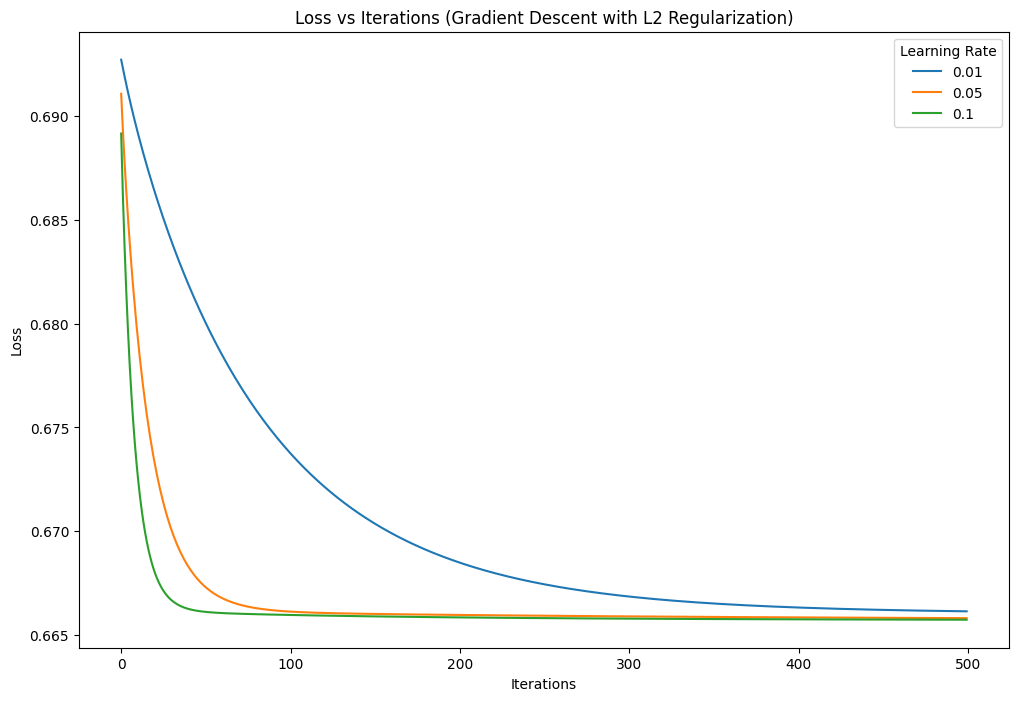

In [8]:
import matplotlib.pyplot as plt
from model import LogisticRegression

learning_rates = [0.01, 0.05, 0.1]
num_iterations = 500

loggers = {}
for learning_rate in learning_rates:
    lr = LogisticRegression(
        learning_rate=learning_rate, 
        num_iterations=num_iterations,
        solver='gradient-descent',
        regularization='l2',
        log=True
    )
    lr.fit(X, y)

    loggers[learning_rate] = lr.solver.history


# Plot loss
plt.figure(figsize=(12, 8))
for learning_rate in learning_rates:
    plt.plot(range(len(loggers[learning_rate])), loggers[learning_rate], label=f"{learning_rate}")

plt.title("Loss vs Iterations (Gradient Descent with L2 Regularization)")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(title="Learning Rate")
plt.show()

# Gradient Descent with Backtracking

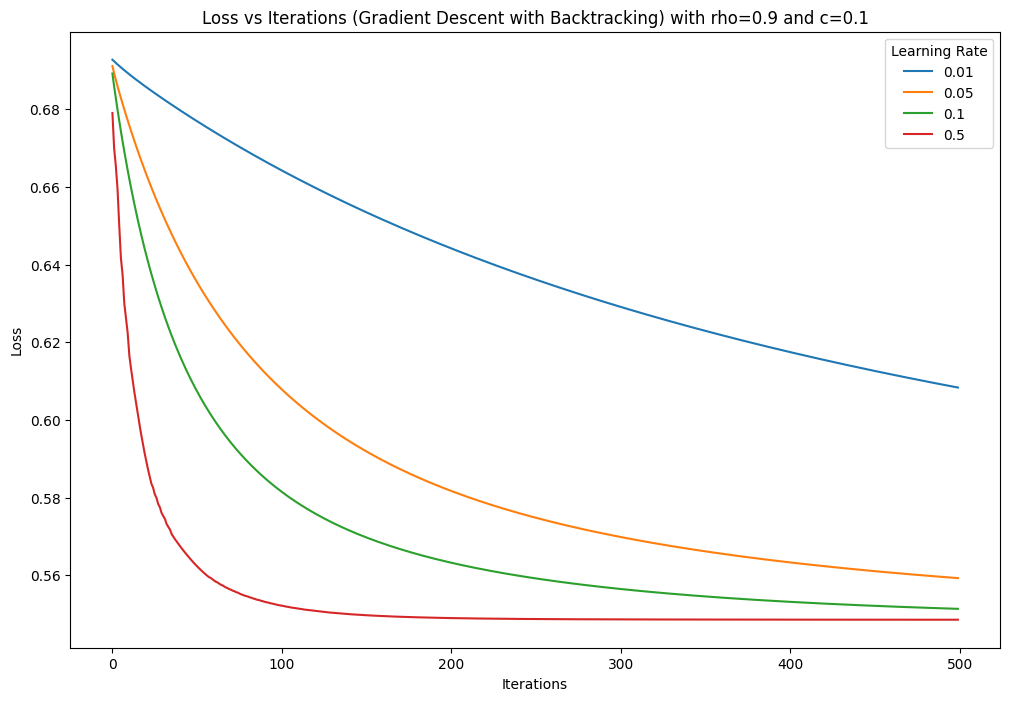

In [9]:
learning_rates = [0.01, 0.05, 0.1, 0.5]
num_iterations = 500
rho = 0.9
c = 0.1

loggers = {}
for learning_rate in learning_rates:
    lr = LogisticRegression(
        learning_rate=learning_rate, 
        num_iterations=num_iterations, 
        solver='gradient-descent', 
        log=True,
        backtracking=True,
        rho=rho,
        c=c
    )
    lr.fit(X, y)

    loggers[learning_rate] = lr.solver.history


# Plot loss
plt.figure(figsize=(12, 8))
for learning_rate in learning_rates:
    plt.plot(range(len(loggers[learning_rate])), loggers[learning_rate], label=f"{learning_rate}")

plt.title(f"Loss vs Iterations (Gradient Descent with Backtracking) with rho={rho} and c={c}")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(title=f"Learning Rate")
plt.show()

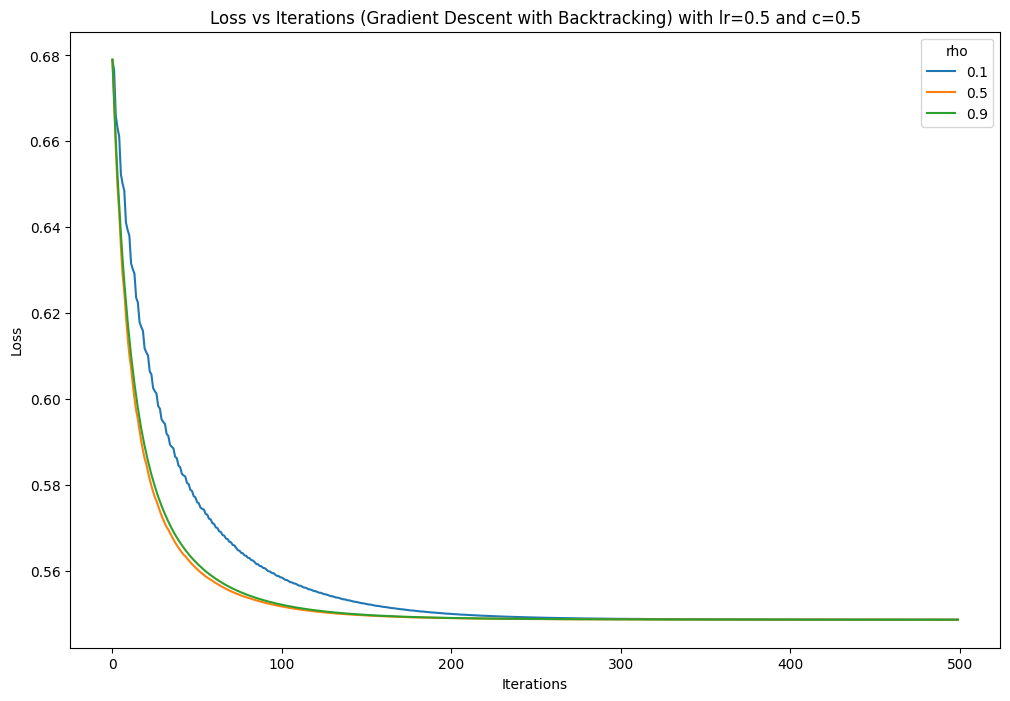

In [10]:
learning_rate = 0.5
num_iterations = 500
rhos = [0.1, 0.5, 0.9]
c = 0.5

loggers = {}
for rho in rhos:
    lr = LogisticRegression(
        learning_rate=learning_rate, 
        num_iterations=num_iterations, 
        solver='gradient-descent', 
        log=True,
        backtracking=True,
        rho=rho,
        c=c
    )
    lr.fit(X, y)

    loggers[rho] = lr.solver.history


# Plot loss
plt.figure(figsize=(12, 8))
for rho in rhos:
    plt.plot(range(len(loggers[rho])), loggers[rho], label=f"{rho}")

plt.title(f"Loss vs Iterations (Gradient Descent with Backtracking) with lr={learning_rate} and c={c}")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(title=f"rho")
plt.show()

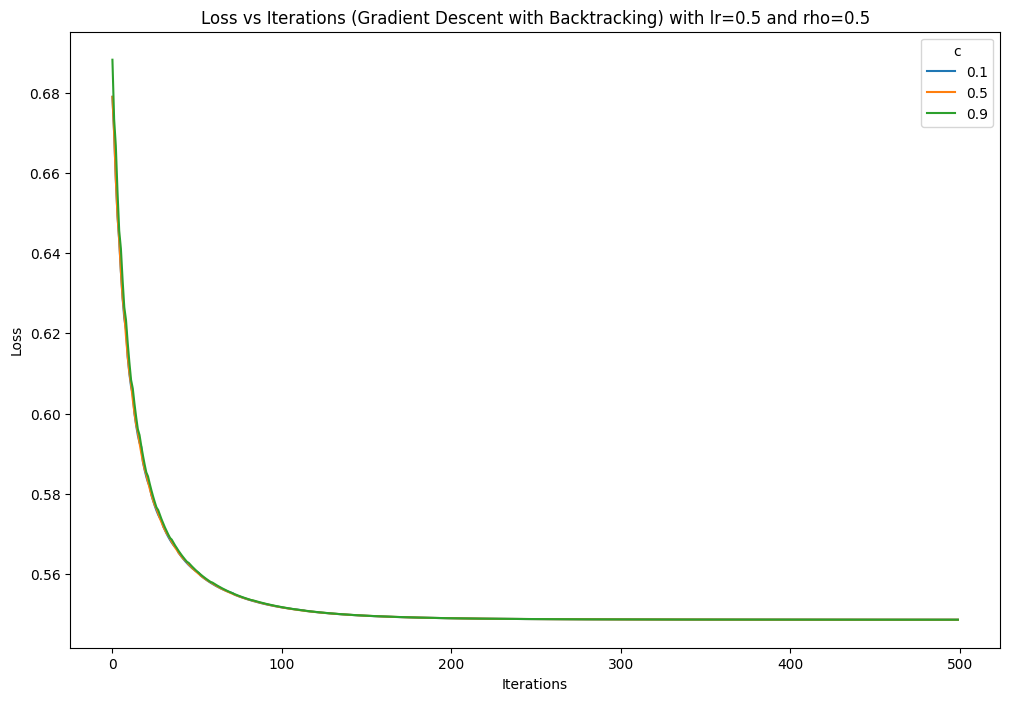

In [11]:
learning_rate = 0.5
num_iterations = 500
cs = [0.1, 0.5, 0.9]
rho = 0.5

loggers = {}
for c in cs:
    lr = LogisticRegression(
        learning_rate=learning_rate, 
        num_iterations=num_iterations, 
        solver='gradient-descent', 
        log=True,
        backtracking=True,
        rho=rho,
        c=c
    )
    lr.fit(X, y)

    loggers[c] = lr.solver.history


# Plot loss
plt.figure(figsize=(12, 8))
for c in cs:
    plt.plot(range(len(loggers[c])), loggers[c], label=f"{c}")

plt.title(f"Loss vs Iterations (Gradient Descent with Backtracking) with lr={learning_rate} and rho={rho}")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(title=f"c")
plt.show()

# Newton

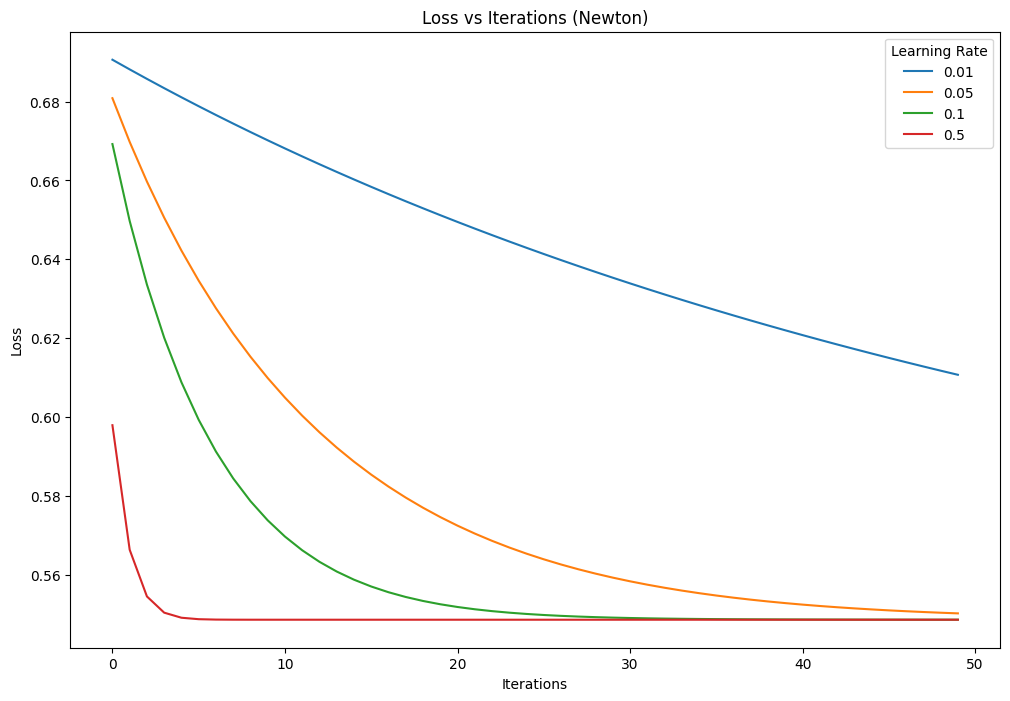

In [12]:
import matplotlib.pyplot as plt
from model import LogisticRegression

learning_rates = [0.01, 0.05, 0.1, 0.5]
num_iterations = 50

loggers = {}
for learning_rate in learning_rates:
    lr = LogisticRegression(
        learning_rate=learning_rate, 
        num_iterations=num_iterations, 
        solver='newton', 
        log=True
    )
    lr.fit(X, y)

    loggers[learning_rate] = lr.solver.history


# Plot loss
plt.figure(figsize=(12, 8))
for learning_rate in learning_rates:
    plt.plot(range(len(loggers[learning_rate])), loggers[learning_rate], label=f"{learning_rate}")

plt.title("Loss vs Iterations (Newton)")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(title="Learning Rate")
plt.show()

# Batch Gradient Descent

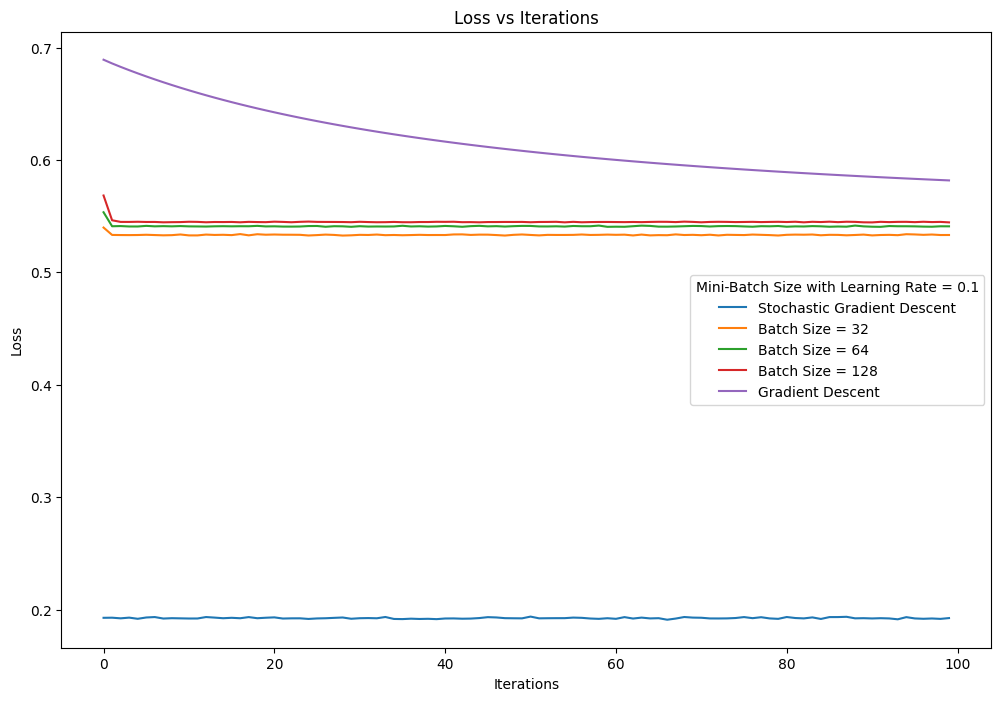

In [13]:
import matplotlib.pyplot as plt
from model import LogisticRegression

batch_sizes = [1, 32, 64, 128, len(X)]
num_iterations = 100
learning_rate = 0.1

loggers = {}
for batch_size in batch_sizes:
    lr = LogisticRegression(
        learning_rate=learning_rate, 
        num_iterations=num_iterations,
        batch_size=batch_size,
        solver='batch-gd', 
        log=True,
    )
    lr.fit(X, y)

    loggers[batch_size] = lr.solver.history


# Plot loss
plt.figure(figsize=(12, 8))
for batch_size in batch_sizes:
    if batch_size == 1:
        label = "Stochastic Gradient Descent"
    elif batch_size == len(X):
        label = "Gradient Descent"
    else:
        label = f"Batch Size = {batch_size}"
    plt.plot(range(len(loggers[batch_size])), loggers[batch_size], label=label)

plt.title("Loss vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(title=f"Mini-Batch Size with Learning Rate = {learning_rate}")
plt.show()